# Missing data and aggregations

In [186]:
import pandas as pd
import numpy as np

np.random.seed(1337)
size = 8

random_matrix = np.random.randint(1, 10, (size, size))

print(f"{random_matrix.size = }")

index = np.random.choice(random_matrix.size, 10, replace=False)
print(f"{index = }")

# type converts it fo float so that we van change elements to None
random_matrix = random_matrix * 1.0

random_matrix.ravel()[index] = None
random_matrix


random_matrix.size = 64
index = array([28, 42, 17, 49, 53, 31, 35,  2, 13, 62])


array([[ 8.,  9., nan,  8.,  3.,  3.,  5.,  9.],
       [ 7.,  7.,  8.,  9.,  2., nan,  7.,  3.],
       [ 3., nan,  2.,  8.,  4.,  2.,  4.,  4.],
       [ 5.,  9.,  9.,  8., nan,  2.,  7., nan],
       [ 5.,  3.,  6., nan,  5.,  3.,  4.,  3.],
       [ 5.,  9., nan,  4.,  9.,  9.,  8.,  5.],
       [ 4., nan,  2.,  3.,  1., nan,  9.,  3.],
       [ 2.,  1.,  2.,  5.,  3.,  1., nan,  8.]])

In [187]:


scores = pd.DataFrame(
    random_matrix,
    index=[f"Player {i}" for i in range(1, size + 1)],
    columns=[f"Round {i}" for i in range(1, size + 1)],
)

scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


## Missing data

In [188]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,True,False,False,False,False,False
Player 2,False,False,False,False,False,True,False,False
Player 3,False,True,False,False,False,False,False,False
Player 4,False,False,False,False,True,False,False,True
Player 5,False,False,False,True,False,False,False,False
Player 6,False,False,True,False,False,False,False,False
Player 7,False,True,False,False,False,True,False,False
Player 8,False,False,False,False,False,False,True,False


In [189]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  6 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  7 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  7 non-null      float64
 7   Round 8  7 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [190]:
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8


In [191]:
scores.loc["Player 8"]["Round 7"] = 4

In [192]:
scores.dropna() # drops all rows that has a nan

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [193]:
scores.dropna(axis = "columns", inplace=False)

,Round 1,Round 7
Player 1,8.0,5.0
Player 2,7.0,7.0
Player 3,3.0,4.0
Player 4,5.0,7.0
Player 5,5.0,4.0
Player 6,5.0,8.0
Player 7,4.0,9.0
Player 8,2.0,4.0


In [194]:
scores.fillna(0, inplace=True) # fills all nulls with zeros

In [195]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


## Missing data - strategy

In [196]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head(20)

df = pd.DataFrame(titanic)
print(type(df))
print(type(titanic))

titanic.head()

titanic = pd.DataFrame(titanic)

titanic.head()


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [197]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [198]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [199]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [200]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [201]:
nans = titanic.isnull()
nans.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [202]:
nans = titanic.isnull().sum()

nans

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

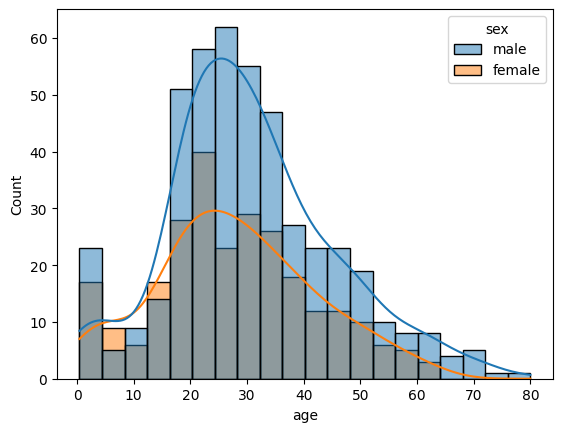

In [203]:
sns.histplot(data = titanic, x = "age", hue = "sex", kde=True)

In [204]:
# case
# a historian (domain expert) advices us to use median age of corresponding gender to fill in missing ages


median_male_age= titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median()
print(median_male_age, median_female_age)



29.0 27.0


In [205]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[
    titanic["sex"] == "male", "age"
].fillna(median_male_age)

TODO: use who category and find median
<br>
left to the reader

In [206]:
titanic.isnull().sum()["age"]
# likvärdigt med
titanic["age"].isnull().sum()
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [207]:
import pandas as pd
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [208]:
titanic.loc[titanic["age"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
82,1,3,female,NaN,0,0,7.7875,Q,Third,woman,False,NaN,Queenstown,yes,True
109,1,3,female,NaN,1,0,24.1500,Q,Third,woman,False,NaN,Queenstown,yes,False
128,1,3,female,NaN,1,1,22.3583,C,Third,woman,False,F,Cherbourg,yes,False
140,0,3,female,NaN,0,2,15.2458,C,Third,woman,False,NaN,Cherbourg,no,False
166,1,1,female,NaN,0,1,55.0000,S,First,woman,False,E,Southampton,yes,False


In [209]:
titanic["age"] = titanic["age"].fillna(median_female_age)
titanic.isnull().sum()["sex"]


0

<AxesSubplot: xlabel='age', ylabel='Count'>

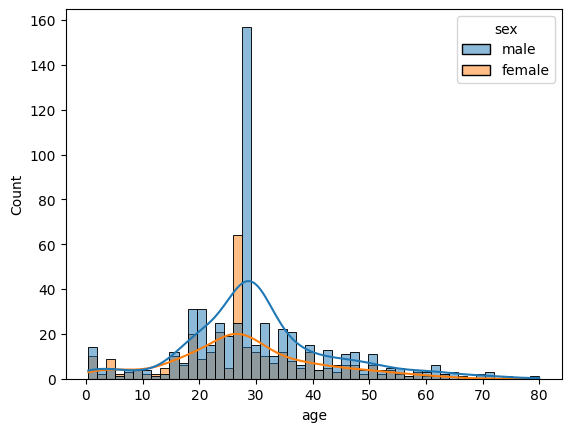

In [210]:
sns.histplot(data = titanic, x = "age", kde = True, hue = "sex", bins = 50)

In [211]:
type(titanic)

pandas.core.frame.DataFrame

## Aggregations

- summarizing data
  - sum()
  - mean()
  - median()
  - max()
  - min()

In [212]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [234]:
# TODO: examine this deprecation with numeric_only
survivors = titanic.groupby("sex").mean(numeric_only = True)[["survived", "age"]]
survivors


,survived,age
sex,,
female,0.742038,27.761146
male,0.188908,30.355581


In [237]:
survived_females_percentage = 100*survivors.loc["female", "survived"]
survived_males_percentage = 100*survivors.loc["male", "survived"]

print(f"Percentage of females that survived {survived_females_percentage:.1f}%")
print(f"Percentage of males that survived {survived_males_percentage:.1f}%")


Percentage of females that survived 74.2%
Percentage of males that survived 18.9%


In [243]:
titanic.groupby("class")[["age", "fare"]].mean()

,age,fare
class,,
First,36.867685,84.154687
Second,29.803424,20.662183
Third,26.038534,13.675550


In [244]:
# Denna är likadan som ovanstående men lite mindre effektiv eftersom den gör beräkningar som inte kommer användas
titanic.groupby("class").mean()[["age", "fare"]]


C:\Users\hakan\AppData\Local\Temp\ipykernel_2120\2634190595.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic.groupby("class").mean()[["age", "fare"]]


,age,fare
class,,
First,36.867685,84.154687
Second,29.803424,20.662183
Third,26.038534,13.675550


In [263]:
survived_class = titanic.groupby(["survived", "pclass"]).count().reset_index()
survived_class

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,1,80,80,80,80,80,80,80,80,80,58,80,80,80
1,0,2,97,97,97,97,97,97,97,97,97,3,97,97,97
2,0,3,372,372,372,372,372,372,372,372,372,6,372,372,372
3,1,1,136,136,136,136,136,134,136,136,136,117,134,136,136
4,1,2,87,87,87,87,87,87,87,87,87,13,87,87,87
5,1,3,119,119,119,119,119,119,119,119,119,6,119,119,119


<AxesSubplot: xlabel='pclass', ylabel='sex'>

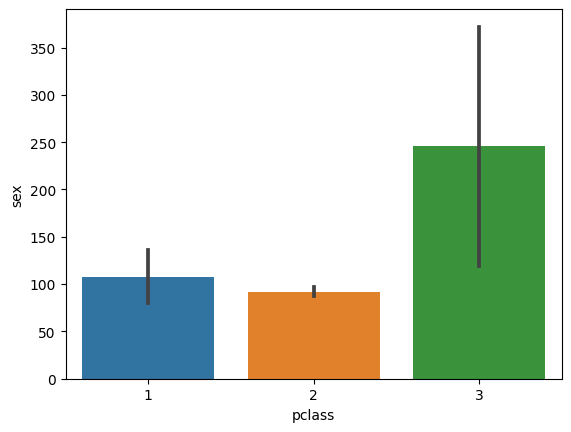

In [261]:
survived_class = titanic.groupby(["survived", "pclass"]).count().reset_index()

sns.barplot(data = survived_class, x = "pclass", y = "sex")


In [265]:
titanic.to_excel("test1.xlsx")